In [ ]:
# Moment accountant
# Last Update: 06/23/2022 by Fei Wei

compute moments for gaussian
here 0.31622776601683794
l1 cost = 0.252288441442412
l2 cost = 0.0999899999999998
compute moments for cactus
l1 cost = 0.18906071843624658
l2 cost = 0.09999836068428848


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


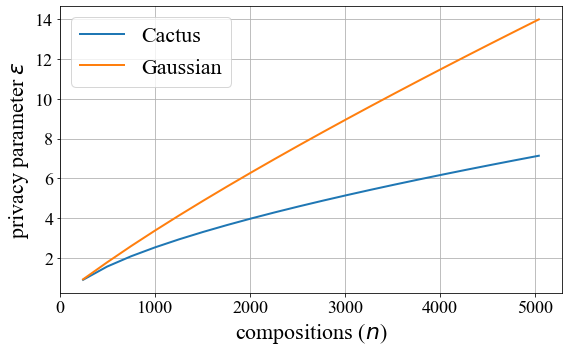

In [2]:
'''Now, we are ready to test other distributions'''

from compute_rdp_general import compute_rdp_general
from compute_rdp_general import compute_delta
from compute_rdp_general import compute_epsilon

from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent

import numpy as np
import matplotlib.pyplot as plt

# the searching grid of orders for the mgf
orders = [1 + x / 10. for x in range(1, 600)]

# set parameters for the accountant
iter_grid = np.linspace(1,21,20)*240
sampling_probability = 250.0/60000
sen = 1;
delta = 1e-5
C=0.1
# you may choose "l1" or "l2" as cost type
c_type="l2"

if c_type=="l2":
    print("compute moments for gaussian")
    rdp_gaussian = np.abs(compute_rdp_general("gaussian",orders,c_type,C,sen,sampling_probability))
    
#     # alternatively, we may try the original moments accountant
#     rdp_gaussian = compute_rdp(q=sampling_probability,
#                     noise_multiplier=np.sqrt(C),
#                     steps=1,
#                     orders=orders)
    eps_grid_gaussian=[]

    print("compute moments for cactus")
    rdp_cactus = np.abs(compute_rdp_general("cactus",orders,c_type,C,sen,sampling_probability))
    eps_grid_cactus=[]

if c_type=="l1":
    print("compute moments for laplace")
    rdp_laplace = np.abs(compute_rdp_general("laplace",orders,c_type,C,sen,sampling_probability))
    eps_grid_laplace=[]

    print("compute moments for airy")
    rdp_airy = np.abs(compute_rdp_general("airy",orders,c_type,C,sen,sampling_probability))
    eps_grid_airy=[]

for iteration in iter_grid:
    if c_type=="l2":
        
        eps_grid_gaussian.append(compute_epsilon(iteration,orders,rdp_gaussian,delta))
        eps_grid_cactus.append(compute_epsilon(iteration,orders,rdp_cactus,delta))
    if c_type=="l1":
        eps_grid_laplace.append(compute_epsilon(iteration,orders,rdp_laplace,delta))
        eps_grid_airy.append(compute_epsilon(iteration,orders,rdp_airy,delta))

plt.figure(figsize=(8,5))

if c_type=="l2":
    plt.plot(iter_grid, eps_grid_cactus,label = ("Cactus"),linewidth=2) 
    plt.plot(iter_grid, eps_grid_gaussian,label = ("Gaussian"),linewidth=2)

if c_type=="l1":
    plt.plot(iter_grid, eps_grid_laplace,label = ("Laplace"),linewidth=2)
    plt.plot(iter_grid, eps_grid_airy,label = ("Airy"),linewidth=2)

plt.xlabel(r"compositions ($n$)",fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel(r"privacy parameter $\epsilon$",fontsize=22)
plt.yticks(fontsize=18)
plt.legend(loc='best',fontsize=22)
plt.tight_layout()
plt.grid()
plt.savefig('TestPlots/MA_dlt_%.e_%s_%.2f_q_%.e_sen_%.e.eps' %(delta,c_type,C,sampling_probability,sen), format='eps')
plt.savefig('TestPlots/MA_dlt_%.e_%s_%.2f_q_%.e_sen_%.e.jpg' %(delta,c_type,C,sampling_probability,sen), dpi=300)

compute moments for gaussian
here 0.31622776601683794
l1 cost = 0.252288441442412
l2 cost = 0.0999899999999998
compute moments for laplace
l1 cost = 0.22358518249551929
l2 cost = 0.09999000000233338
compute moments for cactus
l1 cost = 0.18906071843624658
l2 cost = 0.09999836068428848


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


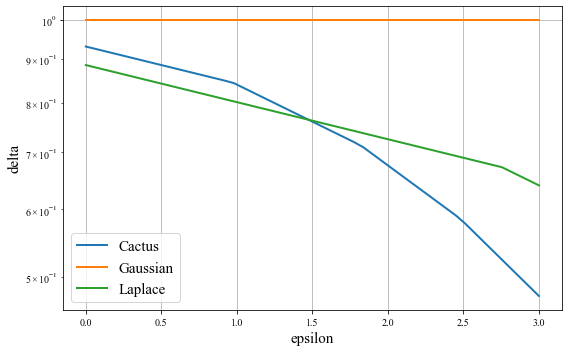

In [7]:
'''
Moments accountant results (eps,delta) for different distributions
'''

from compute_rdp_general import compute_rdp_general
from compute_rdp_general import compute_delta
from compute_rdp_general import compute_epsilon

from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent

import numpy as np
import matplotlib.pyplot as plt

orders = [1 + x / 10. for x in range(1, 600)]

C = 0.1
c_type="l2"
sampling_probability = 0.01
sen = 1
iteration = 1000
eps_grid=np.linspace(0,3,50)

print("compute moments for gaussian")
rdp_gaussian = np.abs(compute_rdp_general("gaussian",orders,c_type,C,sen,sampling_probability))

print("compute moments for laplace")
rdp_laplace = np.abs(compute_rdp_general("laplace",orders,c_type,C,sen,sampling_probability))

print("compute moments for cactus")
rdp_cactus = np.abs(compute_rdp_general("cactus",orders,c_type,C,sen,sampling_probability))


delta_grid_gaussian=[]
delta_grid_laplace=[]
delta_grid_cactus=[]

for eps in eps_grid:
    delta_grid_gaussian.append(compute_delta(iteration,orders,rdp_gaussian,eps))
    delta_grid_laplace.append(compute_delta(iteration,orders,rdp_laplace,eps))
    delta_grid_cactus.append(compute_delta(iteration,orders,rdp_cactus,eps))

plt.figure(figsize=(8,5))
plt.semilogy(eps_grid, delta_grid_cactus,label = ("Cactus"),linewidth=2)
plt.semilogy(eps_grid, delta_grid_gaussian,label = ("Gaussian"),linewidth=2)
plt.semilogy(eps_grid, delta_grid_laplace,label = ("Laplace"),linewidth=2)
plt.xlabel("epsilon",fontsize=15)
plt.ylabel("delta",fontsize=15)
# plt.title("L2-cost=1.0, q=%.2f, sen=%.1f, iteration=%d" %(sampling_probability,sen,iteration),fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig('TestPlots/MA_DltEps_%s_%.1f_q_%.e_sen_%.1f_itr_%d.eps' %(c_type,C,sampling_probability,sen,iteration), format='eps')
plt.savefig('TestPlots/MA_DltEps_%s_%.1f_q_%.e_sen_%.1f_itr_%d.jpg' %(c_type,C,sampling_probability,sen,iteration), dpi=300)


In [ ]:
'''DP-SGD accurancy vs. privacy cost'''

from compute_rdp_general import compute_rdp_general
from compute_rdp_general import compute_delta
from compute_rdp_general import compute_epsilon

from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent

import numpy as np
import matplotlib.pyplot as plt

import csv
import pandas as pd
import scipy
from scipy.interpolate import make_interp_spline, BSpline

sen=1.0
epochs=20
x=np.array(list(range(1,epochs+1)))
variance=0.1

plt.figure(figsize=(8, 5))

filename= ('TestData/log_e%d_%d_d%1.1f_v%.2f.csv' %(epochs,2,sen,variance))
acc_cactus = pd.read_csv(filename) 
iter_grid_old = np.linspace(1,epochs+1,epochs)*240
spl = make_interp_spline(iter_grid_old, acc_cactus['val_accuracy'], k=2)
acc_cactus_smooth = spl(iter_grid)
plt.plot(iter_grid,acc_cactus_smooth,label=('Cactus'),linewidth=2)

filename= ('TestData/log_e%d_%d_d%1.1f_v%.2f.csv' %(epochs,0,sen,variance))
acc_gaussian = pd.read_csv(filename) 
iter_grid_old = np.linspace(1,epochs+1,epochs)*240
spl = make_interp_spline(iter_grid_old, acc_gaussian['val_accuracy'], k=2)
acc_gaussian_smooth = spl(iter_grid)
plt.plot(iter_grid,acc_gaussian_smooth,label=('Gaussian'),linewidth=2)

plt.xlabel(r'iterations ($n$)',fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel('accuracy',fontsize=22)
plt.yticks(fontsize=18)
# plt.gca().set_ylim([0.7, 0.98])
plt.legend(loc='lower right',fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.savefig('MNIST_GaussianCactus_L2_0.1.eps', format='eps')


plt.figure(figsize=(8, 5))

plt.plot(eps_grid_cactus,acc_cactus_smooth,label=('Cactus'),linewidth=2)
plt.plot(eps_grid_gaussian,acc_gaussian_smooth,label=('Gaussian'),linewidth=2)
plt.xlabel(r'privacy parameter $\epsilon$',fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel('accuracy',fontsize=22)
plt.yticks(fontsize=18)
plt.xlim(0,7.5)
# plt.gca().set_ylim([0.7, 0.98])
plt.legend(loc='best',fontsize=22)
plt.grid(True)
plt.tight_layout()
plt.savefig('TestPlots\MNIST_GaussianCactus_L2_0.1_B.eps', format='eps')
plt.savefig('TestPlots\MNIST_GaussianCactus_L2_0.1_B.jpg', dpi=300)